In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

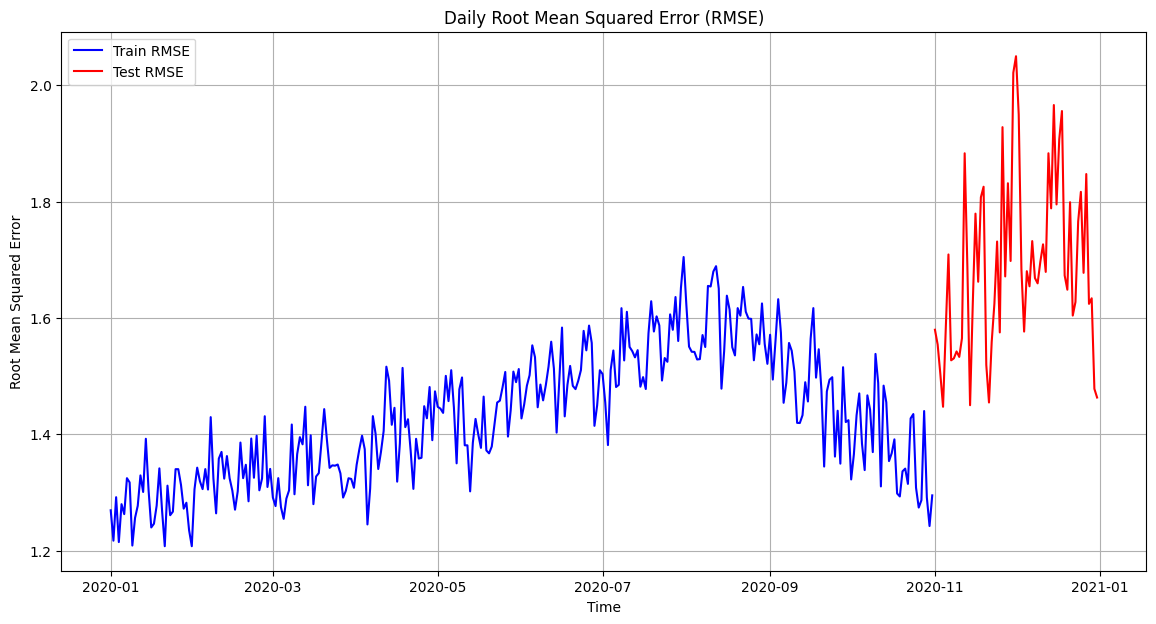

In [22]:
# Load the error data from the provided h5 files
train_errors_path = 'train_errors.h5'
test_errors_path = 'test_errors.h5'
train_errors = pd.read_hdf(train_errors_path)
test_errors = pd.read_hdf(test_errors_path)

train_errors.reset_index(inplace=True)
train_errors.set_index('time', inplace=True)

test_errors.reset_index(inplace=True)
test_errors.set_index('time', inplace=True)


# Calculate the squared errors for each prediction
train_errors['Squared_errors'] = (train_errors['y_train']-train_errors['y_train_pred']) ** 2
test_errors['Squared_errors'] = (test_errors['y_test'] - test_errors['y_test_pred']) ** 2

train_errors_daily = np.sqrt(train_errors['Squared_errors'].resample('D').mean())
test_errors_daily = np.sqrt(test_errors['Squared_errors'].resample('D').mean())


# Plot the daily MSE for train and test sets
plt.figure(figsize=(14, 7))
plt.plot(train_errors_daily.index.to_numpy(), train_errors_daily.to_numpy(), label='Train RMSE', color='blue')
plt.plot(test_errors_daily.index.to_numpy(), test_errors_daily.to_numpy(), label='Test RMSE', color='red')
plt.title('Daily Root Mean Squared Error (RMSE)')
plt.xlabel('Time')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()